✅ Loaded data — Rows: 40946, Columns: 16
✅ Encoded features: 52 columns
✅ Train shape: (32756, 52), Test shape: (8190, 52)
🔎 RMSE: 123,777 €
🔎 R² score: 0.563


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2540147081.py:59: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2540147081.py:60: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/model_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


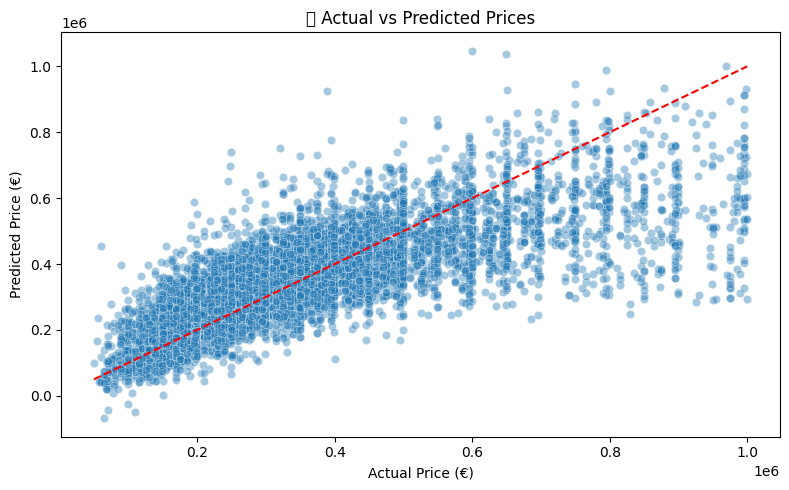

In [27]:
# 💼 Modelling Pipeline: Predicting Property Prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load Cleaned Data ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print(f"✅ Loaded data — Rows: {len(df)}, Columns: {df.shape[1]}")

# === Step 2: Drop Derived Target Leakage Column ===
# We used price_per_m² during EDA, but remove it for training to avoid leakage
if 'price_square_meter' in df.columns:
    df.drop(columns='price_square_meter', inplace=True)

# === Step 3: Feature Selection ===
categorical = ['region', 'province', 'subtype', 'type', 'buildingCondition', 'epcScore']
numerical = ['habitableSurface', 'bedroomCount', 'gardenSurface']
target = 'price'

X = df[categorical + numerical].copy()
y = df[target]

# === Step 4: Encode Categorical Variables ===
X_encoded = pd.get_dummies(X, columns=categorical, drop_first=True)
print(f"✅ Encoded features: {X_encoded.shape[1]} columns")

# === Step 5: Split Train/Test Sets ===
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# === Step 6: Train Linear Regression ===
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Step 7: Evaluate the Model ===
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔎 RMSE: {rmse:,.0f} €")
print(f"🔎 R² score: {r2:.3f}")

# === Step 8: Actual vs Predicted Plot ===
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("📉 Actual vs Predicted Prices")
plt.tight_layout()
plt.savefig("../figures/model_actual_vs_predicted.png")
plt.show()


✅ Data loaded — shape: (40946, 16)

📊 Evaluation on log-transformed model:
MAE:  €91,613
RMSE: €137,891
R²:   0.458


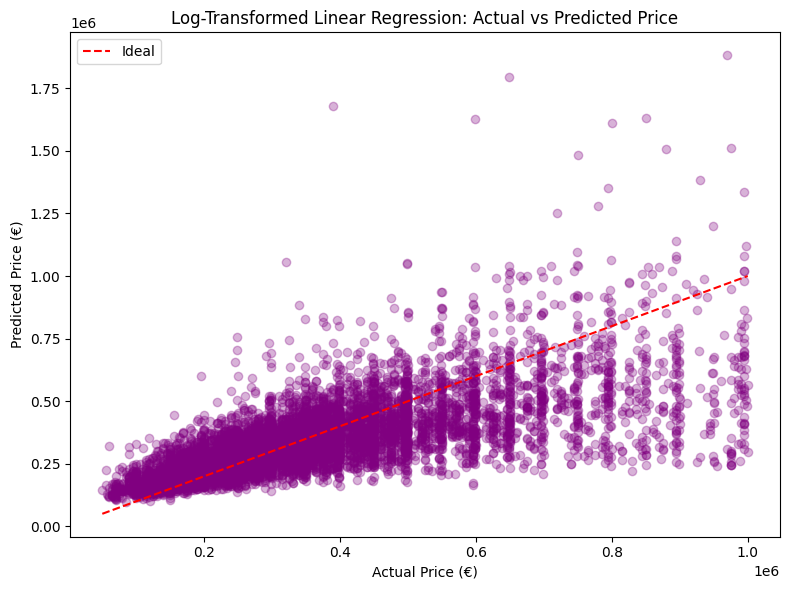

In [28]:
# === Log-Transformed Linear Regression Model ===
# This block:
# 1. Loads the cleaned dataset
# 2. Drops unencoded categorical and text columns
# 3. Applies log-transform to the price for better linear behaviour
# 4. Trains a linear regression model
# 5. Evaluates model performance
# 6. Plots actual vs predicted prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# === 1. LOAD DATA ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. PREPARE FEATURES & LOG-TRANSFORMED TARGET ===

# Drop columns that shouldn't be part of model training:
# - 'price': our target
# - 'price_square_meter': derived from price (would cause leakage)
# - 'locality': still unencoded text
features = df.drop(columns=["price", "price_square_meter", "locality"])

# Define input features (X) and target (y, log-transformed price)
X = features
y = np.log(df["price"])

# === 3. SPLIT INTO TRAIN & TEST ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. TRAIN THE MODEL ===
model = LinearRegression()
model.fit(X_train, y_train)

# === 5. PREDICT AND INVERSE TRANSFORM ===
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)  # inverse log
y_true = np.exp(y_test)      # inverse log

# === 6. EVALUATE MODEL ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

r2 = r2_score(y_true, y_pred)

print("\n📊 Evaluation on log-transformed model:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 7. PLOT PREDICTED VS ACTUAL ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color="purple")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--", label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Log-Transformed Linear Regression: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/model_logreg_actual_vs_predicted.png")
plt.show()



✅ Data loaded — shape: (40946, 16)

📊 Ridge Regression Evaluation:
MAE:  €91,612
RMSE: €137,891
R²:   0.458


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/1351311752.py:54: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/1351311752.py:55: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/ridge_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


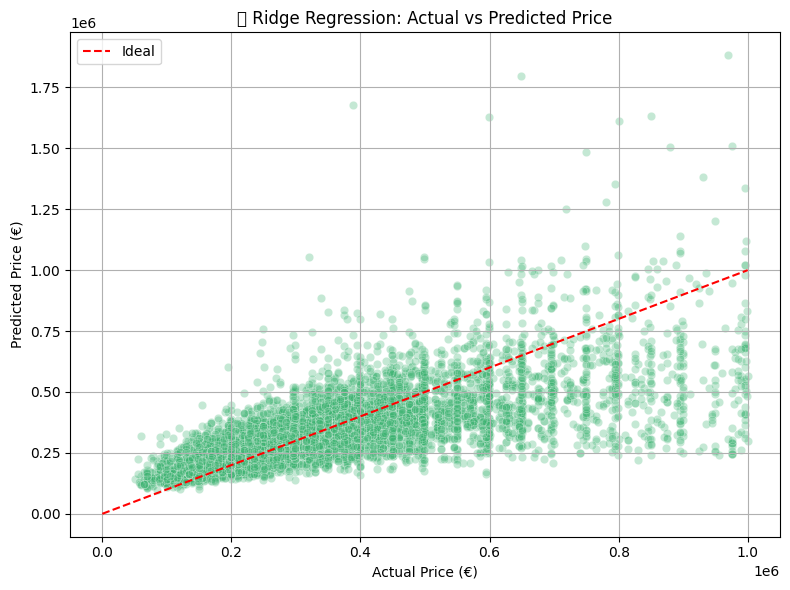

In [29]:
# === Ridge Regression on Log-Transformed Price ===
# Goal: Improve linear regression by applying L2 regularisation (Ridge)
# Motivation: Regularisation helps control overfitting and handles multicollinearity

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === 1. Load data ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. Prepare features & log-transformed target ===
# Drop non-numeric columns and unneeded fields
X = df.drop(columns=["price", "price_square_meter", "locality"])
y = np.log(df["price"])  # log-transform target

# === 3. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Train Ridge model ===
ridge = Ridge(alpha=1.0)  # alpha is the regularisation strength
ridge.fit(X_train, y_train)

# === 5. Predict on test set ===
y_pred_log = ridge.predict(X_test)
y_pred = np.exp(y_pred_log)  # back to normal scale
y_true = np.exp(y_test)

# === 6. Evaluate model ===
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Manual RMSE
r2 = r2_score(y_true, y_pred)

print("\n📊 Ridge Regression Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 7. Plot actual vs predicted ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color="mediumseagreen", edgecolors="w", linewidth=0.5)
plt.plot([0, 1_000_000], [0, 1_000_000], color="red", linestyle="--", label="Ideal")
plt.title("🏠 Ridge Regression: Actual vs Predicted Price")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/ridge_actual_vs_predicted.png")
plt.show()


✅ Data loaded — shape: (40946, 16)

🌲 Random Forest Evaluation:
MAE:  €67,307
RMSE: €97,779
R²:   0.727


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2186670065.py:53: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/2186670065.py:54: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/random_forest_actual_vs_predicted.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


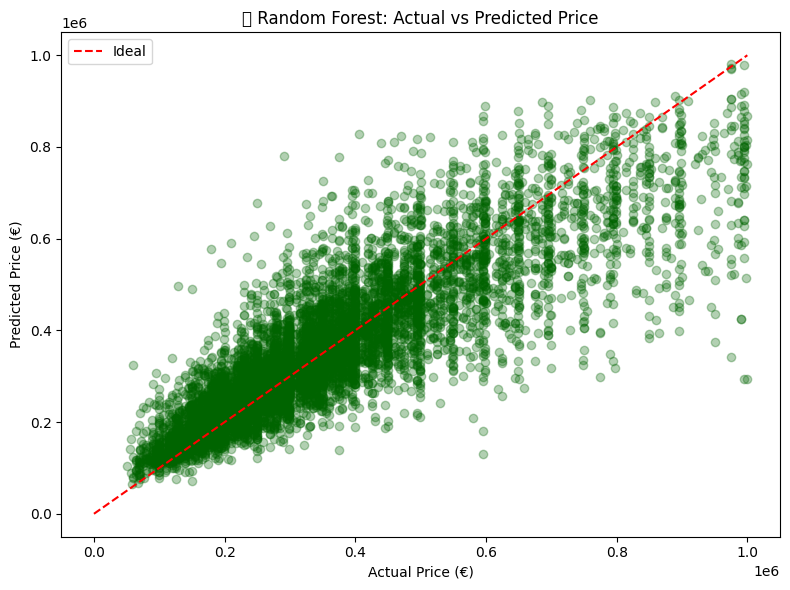

In [30]:
# 🐘 RANDOM FOREST REGRESSION MODEL
# ---------------------------------
# This block loads your cleaned dataset, splits it into training and test sets,
# fits a Random Forest Regressor (non-linear model), and evaluates its performance.
# It also plots actual vs predicted prices for visual inspection.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1. LOAD CLEANED DATA ===
df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. PREPARE FEATURES & TARGET ===
# Drop raw target & unused columns (categorical strings not encoded)
features = df.drop(columns=["price", "price_square_meter", "locality", "province"])
X = features
y = df["price"]

# === 3. TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. TRAIN RANDOM FOREST MODEL ===
model = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=42)
model.fit(X_train, y_train)

# === 5. PREDICT & EVALUATE ===
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🌲 Random Forest Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# === 6. PLOT PREDICTIONS ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='darkgreen')
plt.plot([0, 1e6], [0, 1e6], 'r--', label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("🌲 Random Forest: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/random_forest_actual_vs_predicted.png")
plt.show()


/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:24: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yp/grpj3l556fl4nly4zbgbvzb80000gn/T/ipykernel_66419/154085636.py:25: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.savefig("../figures/random_forest_feature_importance.png")
/Users/Marc/Documents/GitHub/challenge-regression/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


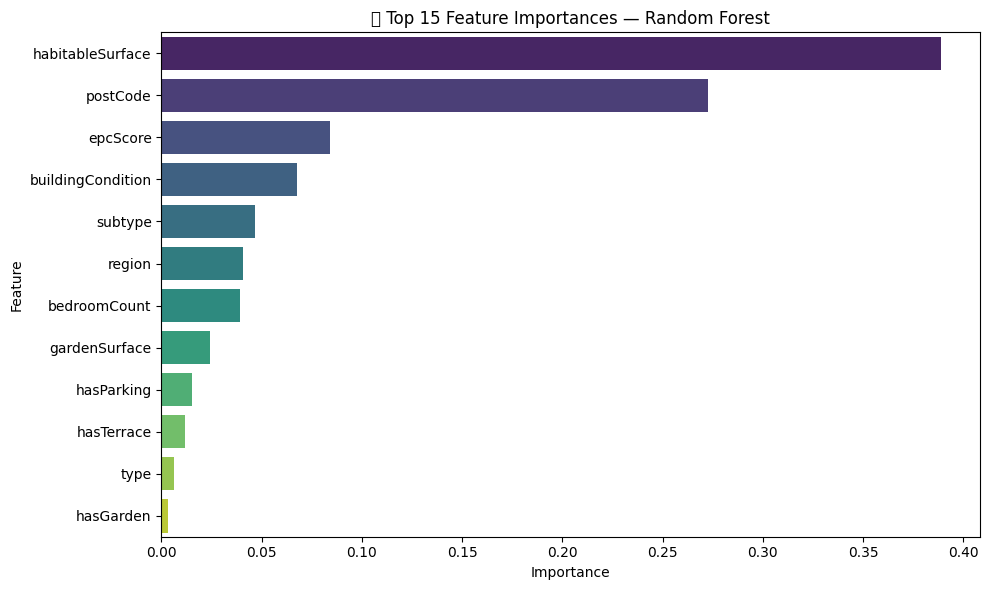

🔝 Top 5 features:
              Feature  Importance
4   habitableSurface    0.388868
3           postCode    0.272510
9           epcScore    0.083893
5  buildingCondition    0.067658
1            subtype    0.046556


In [31]:
# === Feature Importance Plot for Random Forest ===

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume `model` is your trained RandomForestRegressor
# and `X_train` was the DataFrame used for training

# 1. Get feature importances and corresponding names
importances = model.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame for easy sorting/plotting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("🌟 Top 15 Feature Importances — Random Forest")
plt.tight_layout()
plt.savefig("../figures/random_forest_feature_importance.png")
plt.show()

# Optional: print top 5 for terminal visibility
print("🔝 Top 5 features:\n", feat_imp.head(5))


In [41]:
# Tuned previous run of Randomforest
# 

# 📦 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path

cwd = Path.cwd()
print("Current Working Directory:", cwd)


# === 1. LOAD CLEANED DATA ===

df = pd.read_csv("../data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. DROP NON-NUMERIC COLUMNS ===
df = df.drop(columns=["price_square_meter", "locality"])

# === 3. DEFINE FEATURES AND TARGET ===
X = df.drop(columns=["price"])
y = df["price"]

# === 4. SPLIT TRAIN/TEST ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. HYPERPARAMETER GRID FOR RANDOM FOREST ===
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# === 6. RUN RANDOMIZED SEARCH CV ===
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=3,
    scoring='neg_mean_absolute_error', random_state=42, verbose=1
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# === 7. PREDICT AND EVALUATE ===
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# === 8. PLOT ACTUAL VS PREDICTED ===
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='darkgreen')
plt.plot([0, 1_000_000], [0, 1_000_000], 'r--', label="Ideal")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("🔍 Tuned Random Forest: Actual vs Predicted Price")
plt.legend()
plt.tight_layout()
plt.savefig("../figures/rf_tuned_actual_vs_predicted.png")
plt.show()

# === 9. PRINT SCORES AND BEST PARAMETERS ===
print("\n📊 Tuned Random Forest Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")
print("\n🔧 Best Parameters:", search.best_params_)


Current Working Directory: /Users/Marc/Documents/GitHub/challenge-regression/marc
✅ Data loaded — shape: (40854, 15)


KeyError: "['locality'] not found in axis"

In [40]:
# Group similar postcodes into location clusters based on average price/m². This:
#  -Reduces noise from rare postcodes
#  -Improves the model’s ability to generalise
#  -Adds a new location_cluster feature for training

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())

# === 1. LOAD THE CLEANED DATA ===
# We use the same cleaned file that was used for modelling.
df = pd.read_csv("..data/cleaned_data_mvg.csv")
print("✅ Data loaded — shape:", df.shape)

# === 2. GOAL: Group similar postcodes into price-based clusters ===
# Idea: Raw postcode IDs have little meaning unless grouped.
# We'll group postcodes based on average €/m² and assign them a cluster label.

# Step 1: Compute average €/m² for each postcode
postcode_stats = df.groupby("postCode")["price_square_meter"].agg(["count", "mean"]).reset_index()
postcode_stats.columns = ["postCode", "count", "avg_price_per_m2"]

# Step 2: Drop rare postcodes with < 20 listings to reduce noise
postcode_stats = postcode_stats[postcode_stats["count"] >= 20]

# Step 3: Use quantiles to create 5 location clusters
# Each cluster groups postcodes with similar average price/m²
postcode_stats["location_cluster"] = pd.qcut(postcode_stats["avg_price_per_m2"], q=5, labels=False)

# Step 4: Merge the cluster info back into the main dataframe
df = df.merge(postcode_stats[["postCode", "location_cluster"]], on="postCode", how="left")

# Step 5: Check result with boxplot — shows separation between clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="location_cluster", y="price_square_meter")
plt.title("€/m² Distribution by Location Cluster (based on postcode)")
plt.ylabel("€/m²")
plt.xlabel("Location Cluster (0 = lowest, 4 = highest)")
plt.tight_layout()
plt.savefig("figures/eda_location_clusters.png")
plt.show()

# ✅ Ready to use `location_cluster` as new feature in modelling!


/Users/Marc/Documents/GitHub/challenge-regression/marc


FileNotFoundError: [Errno 2] No such file or directory: '..data/cleaned_data_mvg.csv'

In [37]:
# === FAST TUNING OF RANDOM FOREST ===
# Objective: Find a better-performing Random Forest model without long runtimes.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load data (log-transformed target)
df = pd.read_csv("..data/cleaned_data_mvg.csv")
X = df.drop(columns=["price", "price_square_meter"])
y = np.log(df["price"])

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define parameter search space (simplified)
param_dist = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# 4. Setup RandomizedSearchCV (try 5 combinations)
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,                # ⏱ Try 5 different combinations only
    cv=3,                    # 🔁 3-fold cross-validation
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1
)

# 5. Fit search
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# 6. Predict on test set (inverse log)
y_pred_log = best_rf.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

# 7. Evaluate
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"\n📊 Tuned RF (Fast Search) Evaluation:")
print(f"MAE:  €{mae:,.0f}")
print(f"RMSE: €{rmse:,.0f}")
print(f"R²:   {r2:.3f}")

# 8. Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.2, color="mediumseagreen")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title("Tuned RF — Actual vs Predicted Prices")
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.tight_layout()
plt.savefig("figures/tuned_rf_fast_actual_vs_predicted.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '..data/cleaned_data_mvg.csv'